<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("../arquivos/data/iris.csv")
lenses          = pd.read_csv("../arquivos/data/lenses_final.csv")
car             = pd.read_csv("../arquivos/data/cars.csv")
horsecolic      = pd.read_table("../arquivos/data/horse-colic.data")

<h2 style="text-align:center; margin:40px"> KNN </h2>

![](img/knn.png)

O algoritmo <b>K Nearest Neighbors (KNN)</b> consiste em encontrar os <b>K</b> vizinhos mais próximos para determinar a classe (ou valor) de um elemento desconhecido.

<b>Classificação</b>:

<ul>
    <li>Votação simples</li>
    <li>Votação ponderada pela distância</li>
    <li>Etc...</li>
</ul>

<b>Regressão</b>:

<ul>
    <li>Média simples</li>
    <li>Média ponderada pela distância</li>
    <li>Etc...</li>
</ul>

<h4><font color = "red">Atenção:</font> O KNN é um algoritmo computacionalmente caro! </h4>

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha do <b>K</b> é importante para o resultado do algoritmo.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

Primeiro lemos a base, visualizamos e preparamos as variáveis <i>xx</i> e <i>yy</i> que serão usadas para colorir a área que pertence à cada classe na visualização do modelo

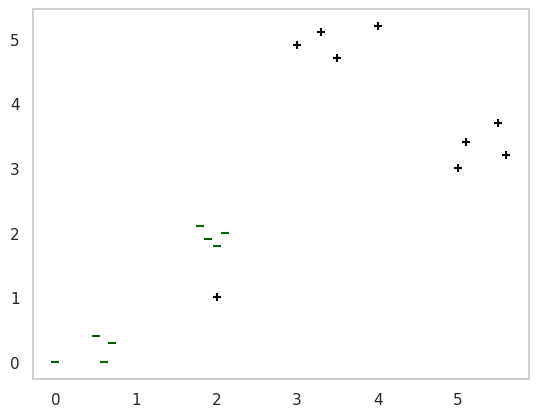

In [5]:
baseDados = pd.read_csv('../arquivos/data/base_knn.csv')

h = .01
x_min, x_max = baseDados.X1.min() - 1, baseDados.X1.max() + 1
y_min, y_max = baseDados.X2.min() - 1, baseDados.X2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '_')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = '+')

Agora treinamos o algoritmo KNN e exibimos a função de decisão (modelo) gerada pelo algoritmo.

<b>Os círculos são novos pontos que desejamos classificar como negativo ou positivo.</b>

/home/alison/Documents/FIAP/machine_learning/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/alison/Documents/FIAP/machine_learning/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/alison/Documents/FIAP/machine_learning/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/alison/Documents/FIAP/machine_learning/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


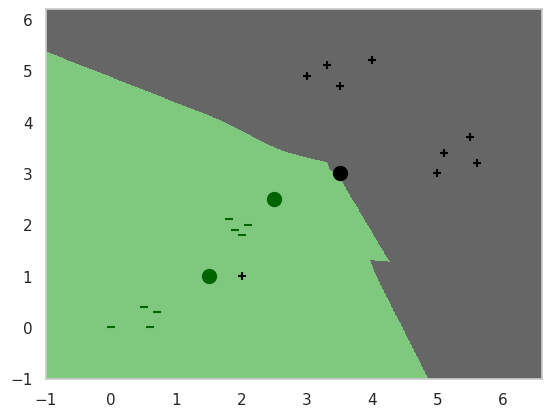

In [6]:
KNN = KNeighborsClassifier(n_neighbors = 2)
X = baseDados[['X1','X2']]
Y = baseDados.Y
KNN.fit(X,Y)

Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = KNN.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '_')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = '+')
plt.scatter([2.5],[2.5], s = 100, c = 'darkgreen' if KNN.predict([[2.5,2.5]]) == 0 else 'black')
plt.scatter([1.5],[1.0], s = 100, c = 'darkgreen' if KNN.predict([[1.5,1.0]]) == 0 else 'black')
plt.scatter([3.5],[3.0], s = 100, c = 'darkgreen' if KNN.predict([[3.5,3.0]]) == 0 else 'black')